# Introducción a Machine Learning 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

## INFERENCIAL (I): POBLACION, MUESTRA Y SESGO

### Población y muestra

#### Conceptos básicos:  
  
+ Población: conjunto sobre el que queremos obtener conclusiones (hacer inferencias).  

+ Muestra: subconjunto de la población al que tenemos acceso y sobre el que hacemos las observaciones (mediciones). Debe ser representativo.


Lo que suele ocurrir es que no tenemos acceso a toda la población, bien porque es muy grande o bien porque en realidad queremos considerar no sólo los elementos actuales de la población sino los futuros también para poder hacer predicciones sobre ellos (por ejemplo, si quiero estimar el resultado de los partidos de fútbol de la semana que viene o el impacto de un medicamento en los futuros pacientes). 

En definitiva, a partir de ahora trabajaremos casi siempre con datos que consideraremos muestras de una población más amplia.

In [3]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_life_satisfaction = pd.read_csv("./data/lifesat_full.csv")

In [4]:
df_life_satisfaction.head()

,Country,GDP per capita (USD),Life satisfaction,Life expectancy,Homicide rate,Employment rate
0,South Africa,11466.189672,4.725336,57.5,13.7,43.0
1,Colombia,13441.492952,6.302556,76.2,24.5,67.0
2,Brazil,14063.982505,6.415187,74.8,26.7,61.0
3,Mexico,17887.750736,6.536861,75.4,18.1,61.0
4,Chile,23324.524751,6.538143,79.9,4.2,63.0


In [5]:
len(df_titanic), len(df_life_satisfaction)

(891, 36)

Realmente los dos son muestras de una población mayor, el dataset de Titanic tiene 891 registros de los dos mil y picos posibles (la población completa de todos los pasajeros que viajaron en él) y el dataset de nivel de satisfacción vital contiene datos de 36 países de los más de 190 países reconocidos en el mundo. En ese sentido ambos datasets son muestras de poblaciones mayores. 

**Lo importante de una muesta es que sea "REPRESENTATIVA" de la población de la que ha sido extraída**. Esto quiere decir que lo que podamos estudiar y deducir de los datos de la muestra podamos aplicarlo al resto de la población. De esa manera podremos hacer estimaciones, deducciones e inferencias sobre la población en general sin necesidad de tener todos los datos o estudiar la población completa.

### Muestra aleatoria

En general, cuando queremos estudiar una población de la que no podemos obtener todos los datos (por los motivos que sean) acudimos a obtener una muestra de la misma. La forma de obtener la muestra impacta en la representatividad de la misma y por lo tanto en la validez de las inferencias que hagamos de lo analizado sobre dicha muestra.  

Para mantener en la muestra las propiedades de la población, es decir su representatividad, intentaremos obtener una muestra aleatoria (más adelante intentaremos que además sea estratificada, pero por ahora sólo que te suene). Es decir, escogiendo al azar los elementos que van a formar parte de nuestra muestra. Al proceso de obtención de una o varias muestras aleatorias se le denomina **muestreo aleatorio**.

Como muestra la figura es como hacer un sorteo y escoger a los ganadores para la muestra. Vamos a verlo con nuestros datasets, suponiendo que estos sean TODA la población y no muestras. Obtengamos una muestra de cada uno de ellos de forma aleatoria aprovechando el método `sample` de pandas:

In [6]:
num_muestras_titanic = int(len(df_titanic) * 0.2) #--> va a cojer el 20% de los datos de la población total
muestra_titanic = df_titanic.sample(num_muestras_titanic, random_state = 42) # --> .sample elije valores al azar. / random_state es como seed, para que se mantengan esos valores 
print(f"Poblacion titanic: {len(df_titanic)} pasajeros")
print(f"Muestra titanic: {len(muestra_titanic)} pasajeros")

num_muestras_paises = int(len(df_life_satisfaction) * 0.2)
muestra_paises = df_life_satisfaction.sample(num_muestras_paises, random_state = 42)
print(f"Poblacion Indice Satifaccion: {len(df_life_satisfaction)} países")
print(f"Muestra titanic: {len(muestra_paises)} países")

Poblacion titanic: 891 pasajeros
Muestra titanic: 178 pasajeros
Poblacion Indice Satifaccion: 36 países
Muestra titanic: 7 países


En este ejemplo hemos obtenido dos muestras aleatorias (escogidas al azar) del 20% del tamaño de la población. ¿Y el tamaño importa? Sí, importa pero el tamaño no asegura la representatividad aunque la mejore.  

Viendo los números de nuestro muestreo, ¿serán representativas nuestras muestras? Para poder contestar ahondemos en eso de la representatividad y en dos conceptos "nuevos": parámetros y estadísticos.

### Representatividad, parámetros y estadísticos

Nuestras muestras aleatorias serían representativas si sus características son muy muy parecidas a las de las población a la que "representan". Es decir, si las medidas que obtengamos sobre las muestras son parecidas a las que obtendríamos en la población. 

¿Y qué medidas? Pues las que vimos al tratar la estadística descriptiva y el análisis de datos en el módulo anterior. Sí, las medidas univariantes (frecuencias, medias, desviaciones), bivariantes, etc de una muestra deberían parecerse a las de la población para que podamos decir que esta es representativa.

Por ejemplo, comparemos el ratio de supervivencia en la muestra aleatoria y en la "población" total del dataset del titanic:

(0.0, 0.7)

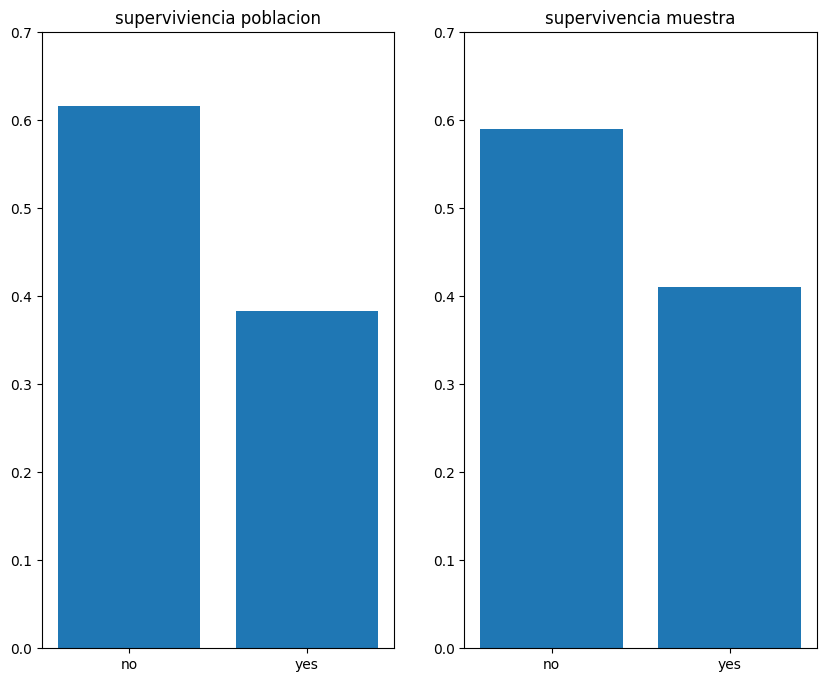

In [7]:
fig,axs = plt.subplots(1,2,figsize = (10,8))

freq = df_titanic["alive"].value_counts(normalize = True)
axs[0].bar(x = freq.index, height = freq.values, label = "Poblacion")
axs[0].set_title("superviviencia poblacion")
axs[0].set_ylim(0,0.7)
freq_m = muestra_titanic["alive"].value_counts(normalize = True)
axs[1].bar(x = freq_m.index, height = freq_m.values, label = "Muestra")
axs[1].set_title("supervivencia muestra")
axs[1].set_ylim(0,0.7)

Se parecen pero hmmm, no del todo.  

Ahora comprobemos las medidas de tendencia central, posición y dispersión de la edad y el precio del ticket, por comparar variables numéricas:

In [8]:
df_titanic_medidas = df_titanic[["age","fare"]].describe()
df_muestra_medidas = muestra_titanic[["age","fare"]].describe()

df_titanic_medidas.merge(df_muestra_medidas, left_index = True, right_index= True, suffixes= ["_pob","_muestra"])


,age_pob,fare_pob,age_muestra,fare_muestra
count,891.000000,891.000000,178.000000,178.000000
mean,30.319458,32.204208,31.110330,30.763038
std,13.063839,49.693429,12.955804,39.544957
min,0.420000,0.000000,0.830000,0.000000
25%,22.000000,7.910400,22.000000,7.895800
50%,32.000000,14.454200,32.000000,14.479150
75%,35.000000,31.000000,36.000000,32.455200
max,80.000000,512.329200,71.000000,262.375000


Aquí hay más parecido "visual", pero todavía no podemos asegurarnos... Y eso que aquí podemos comparar muestra y población... Pero, lo normal no será tener la población (en cuyo caso no necesitamos la muestra), para esas situaciones para saber si las medidas son representativas acudiremos a... los test de hipótesis. Y lo veremos en las siguientes unidades. Antes apliquemos esto mismo al dataset de satisfacción vital y hablemos del sesgo.

In [9]:
df_lifesat_medidas = df_life_satisfaction.describe()
df_muestra_medidas = muestra_paises.describe()

df_lifesat_medidas.merge(df_muestra_medidas, left_index= True, right_index= True, suffixes = ["_pob","_muestra"]).loc["mean"].T

GDP per capita (USD)_pob        42620.982007
Life satisfaction_pob               6.599421
Life expectancy_pob                79.455556
Homicide rate_pob                   3.741667
Employment rate_pob                68.250000
GDP per capita (USD)_muestra    56824.405352
Life satisfaction_muestra           7.072510
Life expectancy_muestra            81.600000
Homicide rate_muestra               1.557143
Employment rate_muestra            69.857143
Name: mean, dtype: float64

Este es incluso más difícil, porque hay medias que se parecen y otras no mucho...

Cuando las medidas hacen referencia a la población (nuetros "_pob" en los ejemplos anteriores) se les llama **parámetros**. Cuando son las medidas hechas sobre las muestras, se les denomina **estadísticos**.

### Sesgos

Se trata de una **distorsión no aleatoria que introducimos en la muestra como consecuencia de la selección de dicha muestra**. Si existe sesgo y no se controla, entonces, en general, haremos inferencias y deducciones erróneas a partir de la muestra. 

Por ejemplo, si realizamos una encuesta sobre cómo va el país, no será lo mismo si todos los encuestados son de una clase social determinada, o de un partido político concreto.

Para verlo, supongamos que escojemos nuestra muestra del titanic pero sin darnos cuenta lo hacemos únicamente sobre pasajeros de Cherbourgh, por ejemplo porque sólo teníamos datos de esa ciudad:

In [10]:
muestra_sesgada = df_titanic.loc[df_titanic.embark_town == "Cherbourg"]

Si consideramos los estadísticos de nuestra como parámetros, veamos que error habríamos cometido, por ejemplo con el ratio de supervivencia:

(0.0, 0.7)

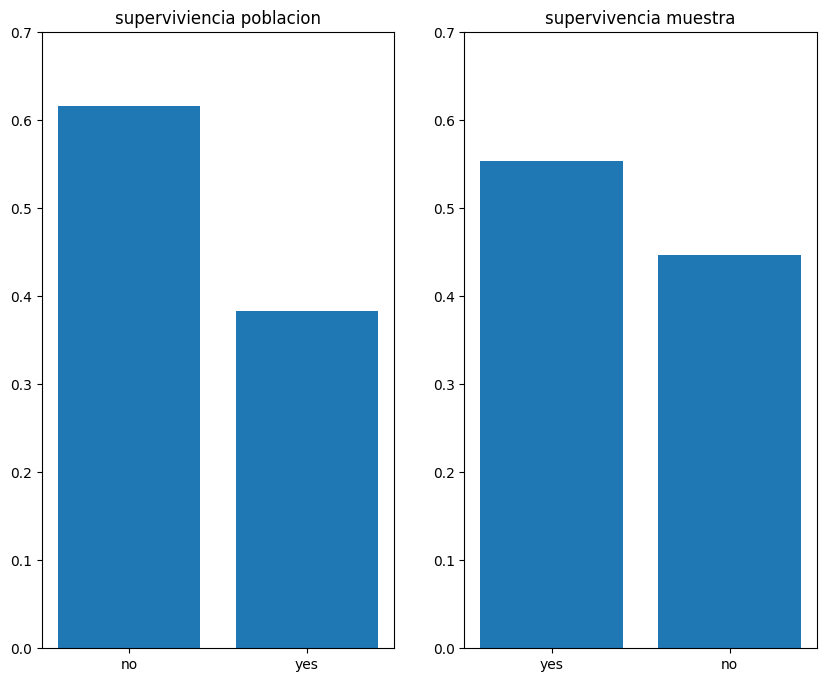

In [11]:
fig,axs = plt.subplots(1,2,figsize = (10,8))

freq = df_titanic["alive"].value_counts(normalize = True)
axs[0].bar(x = freq.index, height = freq.values, label = "Poblacion")
axs[0].set_title("superviviencia poblacion")
axs[0].set_ylim(0,0.7)
freq_m = muestra_sesgada["alive"].value_counts(normalize = True)
axs[1].bar(x = freq_m.index, height = freq_m.values, label = "Muestra")
axs[1].set_title("supervivencia muestra")
axs[1].set_ylim(0,0.7)

Como ya sabíamos hay una gran diferencia, tanto como para convertir al Titanic de una catastrofe a un accidente grave pero no tanto...

Por eso a la hora de seleccionar nuestra muestra debemos controlar mucho los posibles sesgos. Las implicaciones pueden ser mucho más impactantes incluso...

#### Otro ejemplo de sesgo: El sesgo de supervivencia

**El sesgo de supervivencia** (nada que ver con la supervivencia del Titanic) es un sesgo muy difícil de controlar ya que es el sesgo que se produce por tratar con los datos que tenemos y no con todos los posibles, porque son los datos que nos han llegado (que han sobrevivido). Dos ejemplos característicos son el estudio de los castillos y el de los aviones británicos en la segunda guerra mundial




### Estadistica Inferencial

Para terminar recordar qué es lo que buscamos con la estadística inferencial frente a la estadística descriptiva:

+ Estadística descriptiva: Busca obtener información sobre la población basandose enm el estudio de datos de una muestra tomada de ella.  

+ Estadística inferencial: Llegar a conclusiones basadas en la muestra y luego hacerlos validos para toda la población.

## INFERENCIAL (II): Media, intervalo de confianza y error estándar

La media de las variables de una muestra, en general, no coincidirá con la media de la población [aunque no es imposible, por ejemplo si consideramos el conjunto de coches con cuatro ruedas, la media de ruedas es constante e igual para cualquier muestra, pero salvo casos tan "simples" como este ejemplo en general no será el mismo valor]. Eso no quiere decir que no sea representativa o no nos sirva para estimar la media poblacional. Por ejemplo en el caso de la edad del Titanic y una muestra aleatoria:

In [12]:
num_muestras_titanic = int(len(df_titanic) * 0.4)
muestra_titanic = df_titanic.sample(num_muestras_titanic, random_state = 42)
print(f"Media de edad de la muestra: {muestra_titanic['age'].mean()} años")
print(f"Muestra poblacion: {df_titanic['age'].mean()} años")
print(rf"Error muestral: {round(abs(muestra_titanic['age'].mean() - df_titanic['age'].mean()),2)}")

Media de edad de la muestra: 30.786685189215653 años
Muestra poblacion: 30.319458263017587 años
Error muestral: 0.47


Si consideramos que ese "error muestral" es asumible, nuestra muestras será, en términos de edad, representativa de la media de edad poblacional.

Pero claro, no vamos a tener la media poblacional para calcular el error, y en caso de tenerla para que andarnos con muestras... Entonces, ¿qué hacemos?¿qué podemos decir de la edad media del pasaje del Titanic a partir de la edad media de nuestra muestra? 

Aquí es donde entra **el intervalo de confianza.**

### Intervalo de Confianza

El intervalo de confianza nos da una idea del margen de error al realizar un muestreo.  

El intervalo de confianza nos da un rango en el que podemos estar seguros con una probabilidad normalmente del 95% de que la media real de la población estará en ese rango.

Es decir, ese margen asumible de error es el intervalo de confianza, que depende de la probabilidad que queramos tener de que la media poblacional esté en el intervalo indicado. En nuestro caso anterior un intervalo de confianza de un año, supondría que estamos seguros con una cierta pobrabilidad de que la media poblacional estará en el intervalo 29,31. 
  
De hecho como sabemos la media poblacional estamos al 100% seguros, pero ese no es el caso general. ¿Pero cómo se obtiene el IC y para qué probabilidades, o siempre es para el 95% como en la diapositiva?


Tranquilidad, tenemos una fórmula de cálculo que dependerá de esa probabilidad que nos deje tranquilos. Para eso tenemos que introducir el conceptor de **error estándar** y además un poquito de "fe".

### Error Estándar

+ Es la desviación estandar de todas las posibles muestras escogidas en una población.  

SE = S/raizN

+ Se calcula como IC = +- 1.96 * SE  

+ El valor z = 1.96 proviene del 95% de la distribución normal estandar.  

+ Cuanto más se quiera aumentar la confianza, mayor será el IC.

Recordemos que la desviación estándar es una medida de dispersión de las variables continuas que se obtiene con la siguiente fórmula (cuando es un estadístico de una muestra):  

$$s = \sqrt{\frac{\sum\limits_{i=1}^n(x_i - \bar x)^2}{n-1}} $$

Obtengamos el IC (intervalo de confianza) de nuestra muestra del titanic para una probabilidad del 95%, con matices que veremos luego:

In [13]:
from math import sqrt

s = muestra_titanic["age"].std()
SE = s/sqrt(len(muestra_titanic))
media_edad = round(muestra_titanic.age.mean(),2)
IC = round(1.96 * SE,2)
print("IC = ", IC)
print(f"Intervalo de confianza: [{media_edad -IC},{media_edad +IC}]")

IC =  1.36
Intervalo de confianza: [29.43,32.15]


Es decir, con una confianza del 95% podríamos decir que la media de edad poblacional del titanic está entre esos dos valores (que sabemos que es así, porque tenemos la población)

**El matiz**: Para poder usar este estadístico hemos supuesto que la distribución de la variable que queremos caracterízar sigue una figura específica de la que hemos hablado, la distribución normal o gaussiana.

Hasta aquí hemos visto como obtener el intervalo en el cuál podríamos situar la media poblacional a partir de la media de la muestra, pero la pregunta era si podíamos tener cierta confianza estadística de si la media de la muestra representa la media poblacional. 

En general, la media muestral estadísticamente hablando tiene probabilidad 0 de ser la media poblacional, siempre hablaremos de un intervalo de confianza, pero lo que podemos hacer es ajustar ese IC, en función de la probabilidad de estar seguros. 
En las siguientes sesiones veremos el mecanismo para cambiar el IC en función de la confianza estadística que queramos tener. Y el mismo mecanismo, nos permitirá también analizar si a partir de la media muestral podemos saber si la media poblacional estará por encima o por debajo de un umbral. Para ello utilizaremos contraste de hipótesis y test como los empleados durante el módulo de análisis de datos.

## INFERENCIAL (III): Contraste de hipótesis para la media

### Contraste de hipótesis

Dentro de la inferencia estadística, un contraste de hipótesis (también denominado test de hipótesis o prueba de significación) es un procedimiento para juzgar si una propiedad que se supone en una población estadística es compatible con lo observado en una muestra de dicha población.

La mayoría de las veces, vamos a realizar **T-test** o **Z-test**

+ Si no se sabe la desviación estandar de la población usar T-Test.  

+ Si se sabe la desviación estandar de la población.

+ + Tamaño > 30: Usar Z-Test

+ + Tamaño es < 30: Usar T-Test.  

En general no sabremos cual es la desviación estándar de la variable que estamos estudiando para la población así que lo que haremos será aplicar el test T o T-test o T de Student.

#### T-Test: Consideraciones

En una **prueba t de Student**, o **Test-T**, el estadístico utilizado tiene una distribución t de Student si la hipótesis nula es cierta. *Se aplica cuando la población estudiada sigue una distribución normal, pero el tamaño muestral es pequeño* (ojo, porque nosotros nos vamos a saltar esta comprobación, hay otras técnicas como el boostraping, para aplicar cuando no se cumplen estas condiciones pero se escapan del ámbito abarcable por el curso)

### T-Test para comprobar la igualdad a un valor

Si lo que queremos es testar la hipótesis de que no hay diferencia estadística significativa entre la media poblacional y un valor concreto, emplearemos el **T-test bilateral**. Esto lo vamos a emplear para "estrechar" o "ensanchar" el IC:

En este caso, la hipótesis nula (la que rechazaremos si el p-value del test nos sale por debajo de nuestro 0.05 o el grado de confianza que queramos poner) es:

$$H_0: \mu = a$$


**Es decir media poblacional ($\mu$) es igual a un hipotético valor a ($a$)**

Y la hipotesis alternativa, la que ganará confianza si el p-value del test nos sale por debajo de nuestro umbral de confianza (hasta ahora siempre hemos usado 0.05), sería:

$$H_a: \mu \neq a$$

Si el p-value nos sale por debajo del umbral de confianza, rechazaremos la hipótesis nula y diremos que estamos seguros (al nivel de confianza escogido) de que la media poblacional no es ese valor a (es decir aceptamos la hipótesis alternativa)

Vamos a hacer el test para nuestras muestras respecto a la "edad" en el caso de Titanic y al nivel de satisfacción vital para ese otro dataset, pero poniendo como valor de $a$ las medias muestrarles, a ver qué ocurre:

In [14]:
num_muestras_titanic = int(len(df_titanic) * 0.4)
muestra_titanic = df_titanic.sample(num_muestras_titanic, random_state = 42)
print(f"Poblacion titanic: {len(df_titanic)} pasajeros")
print(f"Muestra titanic: {len(muestra_titanic)} pasajeros")

num_muestras_paises = int(len(df_life_satisfaction) * 0.4)
muestra_paises = df_life_satisfaction.sample(num_muestras_paises, random_state = 42)
print(f"Poblacion Indice Satifaccion: {len(df_life_satisfaction)} países")
print(f"Muestra titanic: {len(muestra_paises)} países")

Poblacion titanic: 891 pasajeros
Muestra titanic: 356 pasajeros
Poblacion Indice Satifaccion: 36 países
Muestra titanic: 14 países


Utilizamos nuestro viejo amigo `scipy`:

In [15]:
import scipy.stats as stats
a = muestra_titanic.age.mean()
stats.ttest_1samp(muestra_titanic.age.values,popmean= a)

TtestResult(statistic=0.0, pvalue=1.0, df=355)

In [16]:
a = muestra_paises["Life satisfaction"].mean()
stats.ttest_1samp(muestra_paises["Life satisfaction"].values, popmean = a)

TtestResult(statistic=0.0, pvalue=1.0, df=13)

Como puedes ver en ambos casos sale un p-value = 1, es decir no podemos rechazar que la media muestral no sea la media poblacional, pero eso ya lo suponíamos o de ahí partíamos, que una muestra siempre puede ser la media de la Población si no...  

El T-test nos sirve, entre otras cosas para obtener un IC más ancho o estrecho que el otorgado por la fórmula de la sesión anterior.

Para ello, interpretamos $a$ como si fuera el resultado de aplicar el intervalo de confianza $IC$:

$$a = \bar x \pm IC$$
 

Fijado un p-value podemos ir forzando los IC hasta encontrar el que da justo un p-value en el test ligeramente superior.  

Para empezar, comprobemos que para la "muestra" del titanic el valor de IC que nos da un p-value límite de 0.05 es precisamente el calculado con la fórmula de la sesión anterior ($IC = 1.96 * SE$), es decir 1.36 años:

In [17]:
# Vamos a ir probando ICs desde 0 años,cada vez más grandes hasta llegar a dar un p-value menor que 0.05 el anterior lo consideraremos nuestro IC máximo de garantía
# para el caso de p-value = 0.05
import numpy as np 

p_value_target = 0.05

previous_IC = 0
for IC in np.arange(0,1.5,0.05): # partimos de IC de 0 años (a = media muestral) y vamos subiendo hasta 1.5, 
                                      # hasta encontrar el IC máximo (que debería ser 1.35), que nos garantice al 95% que la media puede ser ese valor
    a = muestra_titanic.age.mean() + IC # La curva es simétrica nos vale con testar un lado solo
    p_value  = stats.ttest_1samp(a=muestra_titanic.age.values,popmean= a).pvalue
    print(f"Para un IC: {IC}, comprobamos a = {a} y nos da un p-value = {p_value}")
    if p_value <= p_value_target:
        print(f"para IC =  {IC} se rechaza la hipótesis nula de igualda, es decir a = {a}",\
               f"ya no es una posible media poblacional al {(1-p_value_target)*100}% de signifcacion")
        print(f"Nuestro IC escogido es entonces, IC = {previous_IC}")
        break
    previous_IC = IC

Para un IC: 0.0, comprobamos a = 30.786685189215653 y nos da un p-value = 1.0
Para un IC: 0.05, comprobamos a = 30.836685189215654 y nos da un p-value = 0.9426585918232326
Para un IC: 0.1, comprobamos a = 30.886685189215655 y nos da un p-value = 0.8856142034354949
Para un IC: 0.15000000000000002, comprobamos a = 30.936685189215652 y nos da un p-value = 0.829159221404719
Para un IC: 0.2, comprobamos a = 30.986685189215653 y nos da un p-value = 0.7735768867669685
Para un IC: 0.25, comprobamos a = 31.036685189215653 y nos da un p-value = 0.7191370201025511
Para un IC: 0.30000000000000004, comprobamos a = 31.086685189215654 y nos da un p-value = 0.6660920918175457
Para un IC: 0.35000000000000003, comprobamos a = 31.136685189215655 y nos da un p-value = 0.6146737329749277
Para un IC: 0.4, comprobamos a = 31.186685189215652 y nos da un p-value = 0.5650897663098774
Para un IC: 0.45, comprobamos a = 31.236685189215653 y nos da un p-value = 0.5175218188417169
Para un IC: 0.5, comprobamos a = 31

Pero podemos cambiar el target y ver cómo reducir el IC a expensas de la confianza estadística, por ejemplo p-value = 0.1 (el 90% de significación)

In [18]:
# Vamos a ir probando ICs cada vez más grandes hasta llegar a dar un p-value menor que 0.05 el anterior lo consideraremos nuestro IC máximo de garantía
# para el caso de p-value = 0.05
p_value_target = 0.1
import numpy as np
previous_IC = 0.5
for IC in np.arange(0.5,1.5,0.05): # partimos de IC de 0.5 años y vamos subiendo hasta 1.5 hasta encontrar el IC máximo (que debería ser 1.35)
    a = muestra_titanic.age.mean() + IC # La curva es simétrica nos vale con testar un lado solo
    p_value  = stats.ttest_1samp(a=muestra_titanic.age.values,popmean= a).pvalue
    if p_value <= p_value_target:
        print(f"para IC =  {IC} se rechaza la hipótesis nula de igualda, es decir a = {a}",\
               f"ya no es una posible media poblacional al {(1-p_value_target)*100}% de signifcacion")
        print(f"Nuestro IC escogido es entonces, IC = {previous_IC}")
        break
    previous_IC = IC

para IC =  1.1500000000000006 se rechaza la hipótesis nula de igualda, es decir a = 31.936685189215655 ya no es una posible media poblacional al 90.0% de signifcacion
Nuestro IC escogido es entonces, IC = 1.1000000000000005


O podemos aumentar el IC para estar más seguros todavía de que la media poblacional caerá en ese intervalor, por ejemplo al 99%, p-target = 0.01

In [19]:
# Vamos a ir probando ICs cada vez más grandes hasta llegar a dar un p-value menor que 0.05 el anterior lo consideraremos nuestro IC máximo de garantía
# para el caso de p-value = 0.05
p_value_target = 0.01
import numpy as np
previous_IC = 0.5
for IC in np.arange(0.5,2,0.05): # partimos de IC de 0.5 años y vamos subiendo hasta 1.5 hasta encontrar el IC máximo (que debería ser 1.35)
    a = muestra_titanic.age.mean() + IC # La curva es simétrica nos vale con testar un lado solo
    p_value  = stats.ttest_1samp(a=muestra_titanic.age.values,popmean= a).pvalue
    if p_value <= p_value_target:
        print(f"para IC =  {IC} se rechaza la hipótesis nula de igualda, es decir a = {a}",\
               f"ya no es una posible media poblacional al {(1-p_value_target)*100}% de signifcacion")
        print(f"Nuestro IC escogido es entonces, IC = {previous_IC}")
        break
    previous_IC = IC

para IC =  1.8000000000000012 se rechaza la hipótesis nula de igualda, es decir a = 32.58668518921566 ya no es una posible media poblacional al 99.0% de signifcacion
Nuestro IC escogido es entonces, IC = 1.750000000000001


Ahora necesitaríamos un IC de 1.75 años.

Para terminar apliquémoslo a la satisfacción vital y obtener el IC para pvalue de 0.05 (el IC según la fórmula) y para pvalue del 0.1:

In [20]:
# Nos hacemos una idea de donde puede estar el margen
print(muestra_paises["Life satisfaction"].mean())
print(df_life_satisfaction["Life satisfaction"].mean())

6.503470342300567
6.599421401893583


In [21]:
# Para p-value = 0.05
previous_IC = 0.1
p_target = 0.05
for IC in np.arange(0.1,1,0.1): # Probamos de 0.1 a 1 puntos de IC en saltos de 0.1
    a = muestra_paises["Life satisfaction"].mean() + IC
    pvalue = stats.ttest_1samp(a=muestra_paises["Life satisfaction"].values,popmean= a).pvalue
    if pvalue <= p_target:
        print("IC escogido:", round(previous_IC,2))
        break
    previous_IC = IC
    

IC escogido: 0.4


In [22]:
# Para p-value = 0.1
previous_IC = 0.1
p_target = 0.1
for IC in np.arange(0.1,1,0.1): # Probamos de 0.1 a 1 puntos de IC en saltos de 0.1
    a = muestra_paises["Life satisfaction"].mean() + IC
    pvalue = stats.ttest_1samp(a=muestra_paises["Life satisfaction"].values,popmean= a).pvalue
    if pvalue <= p_target:
        print("IC escogido:", round(previous_IC,2))
        break
    previous_IC = IC

IC escogido: 0.3


In [23]:
# Para p-value = 0.01
previous_IC = 0.1
p_target = 0.01
for IC in np.arange(0.1,1,0.1): # Probamos de 0.1 a 1 puntos de IC en saltos de 0.1
    a = muestra_paises["Life satisfaction"].mean() + IC
    pvalue = stats.ttest_1samp(a=muestra_paises["Life satisfaction"].values,popmean= a).pvalue
    if pvalue <= p_target:
        print("IC escogido:", round(previous_IC,2))
        break
    previous_IC = IC

IC escogido: 0.6


## INFERENCIAL (IV): Contraste de hipótesis para la media (II)

In [24]:
num_muestras_titanic = int(len(df_titanic) * 0.4)
muestra_titanic = df_titanic.sample(num_muestras_titanic, random_state = 42)
print(f"Poblacion titanic: {len(df_titanic)} pasajeros")
print(f"Muestra titanic: {len(muestra_titanic)} pasajeros")

num_muestras_paises = int(len(df_life_satisfaction) * 0.4)
muestra_paises = df_life_satisfaction.sample(num_muestras_paises, random_state = 42)
print(f"Poblacion Indice Satifaccion: {len(df_life_satisfaction)} países")
print(f"Muestra titanic: {len(muestra_paises)} países")


Poblacion titanic: 891 pasajeros
Muestra titanic: 356 pasajeros
Poblacion Indice Satifaccion: 36 países
Muestra titanic: 14 países


### T-test para umbrales

En este caso la hipótesis nula puede tomar dos "aspectos":


$$H_0: \mu \leq a$$
$$o$$
$$H_0: \mu \geq a$$


Y las hipótesis alternativas equivalentes quedarían:  

$$H_a: \mu > a$$
$$o$$
$$H_a: \mu < a$$  

¿Cómo se aplica? Comprobemos si la media de "Life satisfaction" de la poblacion de países es mayor que 6.6, por ejemplo (que sabemos que es menor) con una confianza estadística del 95%. En este caso nuestra hipótesis alternativa es $H_a: \mu > 6.6$ y la hipótesis nula $H_0: \mu \leq a$.

In [25]:
data = muestra_paises["Life satisfaction"]
stats.ttest_1samp(a=data,popmean=6.6,alternative='greater')

TtestResult(statistic=-0.43985840098335277, pvalue=0.6663681557371673, df=13)

Es decir en este caso no podemos rechazar la hipótesis nula, y no podemos afirmar que la media de la satisfacción vital sea para la población mayor que 6.6 con una significación del 95%. Probemos ahora a ver si podemos aceptar que la satisfacción vital media es menor que 4.5, por ejemplo:

$H_0: \mu \ge 4.5$  

$H_a: \mu < 4.5$

In [26]:
data = muestra_paises["Life satisfaction"]
stats.ttest_1samp(a=data,popmean=4.5,alternative='less')

TtestResult(statistic=9.129248794457022, pvalue=0.9999997438782476, df=13)

Claramente tampoco podemos aceptar la hipótesis alternativa de que la media de la satisfacción vital de todos los países estás por debajo de 4.5, al menos no al 95%. 

### T-test para dos muestras
Podemos comparar las medias de variables de dos muestras de poblaciones diferentes. 

Ejemplo: Queremos comprobar el desempeño de dos call centers en términos de longitud media de las llamadas y encontrar si hay diferencias estadísticamente significativas. 

**$H_0$** (hipótesis nula): no hay diferencia entre la media del tiempo de llamadas entre ambos call centers  
**$H_a$** (hipótesis alternativa): existe una diferencia entre la media del tiempo de llamadas de ambos call centers

Seleccionamos aleatoriamente 20 llamadas de cada call center y medimos la longitud media de cada llamada (en segundos):


Call Center A: 115, 138, 109, 141, 139, 131, 123, 128, 144, 167, 134, 142, 174, 149, 115, 152, 131, 161, 131, 121  
Call Center B: 137, 125, 86, 121, 101, 110, 129, 136, 102, 114, 131, 109, 119, 144, 145, 121, 137, 131, 134, 126  

In [27]:
# Call Center A
A = [115, 138, 109, 141, 139, 131, 123, 128, 144, 167, 134, 142, 174, 149, 115, 152, 131, 161, 131, 121]

# Call Center B
B = [137, 125, 86, 121, 101, 110, 129, 136, 102, 114, 131, 109, 119, 144, 145, 121, 137, 131, 134, 126]

In [28]:
stats.ttest_ind(a=A, b=B, alternative='two-sided')

TtestResult(statistic=2.761988576903894, pvalue=0.008802045351068372, df=38.0)

Con este p-value podemos rechazar la hipótesis nula de que no existe diferencia entre ambas y aceptar que existe una diferencia en la duración media de las llamadas a un call center y otro.

## INFERENCIAL (V): Frecuencias Muestrales

In [29]:
num_muestras_titanic = int(len(df_titanic) * 0.4)
muestra_titanic = df_titanic.sample(num_muestras_titanic, random_state = 42)
print(f"Poblacion titanic: {len(df_titanic)} pasajeros")
print(f"Muestra titanic: {len(muestra_titanic)} pasajeros")


Poblacion titanic: 891 pasajeros
Muestra titanic: 356 pasajeros


### Z-test para proporciones y frecuencias

Es hora de trabajar sobre las medidas que tomamos en las variables categóricas, es decir sobre sus frecuencias y poder hacer suposiciones y testar hipótesis sobre las frecuencias de esas mismas variables para la población total de la que hemos obtenido nuestra muestra.

### Test para un valor concreto de frecuencia o proporción

Usemos un ejemplo para ver el Z-test aplicado a una frecuencia. En concreto, supongamos que queremos saber si dada la tasa de supervivencia de nuestra muestra:

In [30]:
tasa_supervivencia_muestral = round(muestra_titanic["alive"].value_counts(normalize = True)["yes"] * 100,2)
tasa_supervivencia_muestral

39.33

podemos rechazar una tasa un poco menor, digamos un 37%, con una significación del 95% (probabilidad de no equivocarnos al rechazar la hipótesis nula). En términos de hipótesis:

$$H_0: \pi = 37\,\% \; \text{(La hipótesis nula es la contraria a lo que estamos queriendo reforzar)}$$

$$H_a: \pi \neq 37\,\%$$

Para aplicar el test recurrimos a otro paquete, esta vez `statsmodels`:

In [31]:
from statsmodels.stats.proportion import proportions_ztest

p_hat = tasa_supervivencia_muestral/100 # Proporcion o frecuecia de la variable en la muestra
n = len(muestra_titanic)       # Tamaño de la muestra
Pi = 0.37     # Proporción o frecuencia que queremos probar en la población
# Calcular el estadístico Z y el p-valor
z_stat, p_value = proportions_ztest(p_hat * n, n, Pi)

# Mostrar resultados
print(f"Estadístico Z: {z_stat}")
print(f"P-valor: {p_value}")


Estadístico Z: 0.8999781162822953
P-valor: 0.3681318966771918


El p-valor obtenido no nos permite rechazar la hipótesis nula, por lo que la tasa de supervivencia en la población para una confianza del 95% no podría ser 37. Probemos un valor aún menor, 32% (y sí así podríamos encontrar el equivalente al IC para esta tasa)

In [32]:
p_hat = tasa_supervivencia_muestral/100 # Proporcion o frecuecia de la variable en la muestra
n = len(muestra_titanic)       # Tamaño de la muestra
Pi = 0.32   # Proporción o frecuencia que queremos probar en la población
# Calcular el estadístico Z y el p-valor
z_stat, p_value = proportions_ztest(p_hat * n, n, Pi)

# Mostrar resultados
print(f"Estadístico Z: {z_stat}")
print(f"P-valor: {p_value}")


Estadístico Z: 2.8312616276176983
P-valor: 0.004636477880043043


Para ese p-value sí que podríamos rechazar la hipótesis nula y decir que la tasa de supervivencia en la "población" del titanic es superior a 32%, con una confianza del 95%

### Test para umbrales de una proporción

Al igual que ocurría con el caso de testar si la media de una población sería mayor o menor que un umbral, podemos aplicar el test Z para estimar la significación estadística de hipótesis análogas sobre proporciones o frecuencias

Por ejemplo, supongamos que nuestra hipótesis es que la tasa de supervivencia es menor que 40%, cómo serían nuestras hipótesis nula y alternativa:

$$H_0: \pi \ge 40\,\%$$
$$H_a: \pi < 40\,\%$$

Y nuestro test:

In [33]:
p_hat = tasa_supervivencia_muestral/100 # Proporcion o frecuecia de la variable en la muestra
n = len(muestra_titanic)       # Tamaño de la muestra
Pi = 0.40     # Proporción o frecuencia que queremos probar en la población
# Calcular el estadístico Z y el p-valor
z_stat, p_value = proportions_ztest(p_hat * n, n, Pi, alternative = "smaller")

# Mostrar resultados
print(f"Estadístico Z: {z_stat}")
print(f"P-valor: {p_value}")

Estadístico Z: -0.2587919905189477
P-valor: 0.3978978690261754


No podemos rechazar la hipótesis nula y por tanto no podemos asumir que la tasa de supervivencia en la población sea menor al 40%, con un 95% de confianza estadística.


Probemos ahora para la hipótesis de que la tasa debe ser mayor que un 30%:

$$H_0: \pi \leq 30\,\%$$
$$H_a: \pi > 30\,\%$$

In [35]:
p_hat = tasa_supervivencia_muestral/100 # Proporcion o frecuecia de la variable en la muestra
n = len(muestra_titanic)       # Tamaño de la muestra
Pi = 0.30     # Proporción o frecuencia que queremos probar en la población
# Calcular el estadístico Z y el p-valor
z_stat, p_value = proportions_ztest(p_hat * n, n, Pi, alternative = "larger") # Fijate que los valores alternative son diferentes a los usados t-test

# Mostrar resultados
print(f"Estadístico Z: {z_stat}")
print(f"P-valor: {p_value}")

Estadístico Z: 3.60377503215186
P-valor: 0.0001568142715050189


El p-value obtenido nos lleva a rechazar la hipótesis nula y por tanto podemos decir con una confianza estadística del 95% que la tasa de supervivencia en la población es mayor al 30%.

### Z-Test para comprobar proporciones y ratios en dos poblaciones

Igual que en la sesión anterior comparamos dos muestras de llamadas de dos callcenter diferentes para poder decir si la media de la duración de llamadas era diferetne, podemos hacer lo mismo respecto a la frecuencia o ratio o proporción de una variable categórica medida en dos muestras distintas.

Por ejemplo: 
- Efectividad de medicamentos (proporción de personas que han mejorado tras un tratamiento con dos medicamentos distintos o un medicamento y un placebo)
- Resultados electorales (proporción de personas que votan a cada candidato)
- Comportamiento de consumidores (proporción de consumidores que compran un producto)
- Resultados de encuestas (proporción de personas que responden en dos regiones diferentes)
- **A/B testing**: En estudios de mercado, se implementan dos versiones de un producto (A y B) y se prueban en diferentes grupos de usuarios


**Ejemplo**: Para conseguir registros en nuestra web, creamos dos secciones de registro diferentes (una más colorida, y otra más sobria). 

El primer diseño se muestra a 200 personas, de las cuales conseguimos 130 registros (65% de conversiones)  
El segundo diseño se muestra a 100 personas, de las cuales conseguimos 56 registros (56% de conversiones)

¿Es esta diferencia estadísticamente significativa? ¿Qué opción escojo?

1. Definimos las hipótesis, en nuestro caso la alternativa es que la primera tiene un ratio de conversión mayor que la segunda:  
$$H_0: p_1=p_2$$  
$$H_1: p_1>p_2$$

2. Calculamos el estadístico (fíjate en cómo introducimos las dos proporciones):

In [36]:

exitos = np.array([130,56])
muestras = np.array([200,100])


(z,pvalor) = proportions_ztest(count=exitos, nobs=muestras, alternative='larger')

print(z)
print(pvalor)

1.5139419980680997
0.06502027550522334


No podemos rechazar la hipótesis nula con un 95% de confianza y por tanto, no podemos decir que una de las webs haya resultado mejor que la otra con ese nivel de confianza estadística (ojo fíjate que sí podríamos decirlo con un 90% de confianza)